# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [45]:
# Install necessary libraries
# !pip install uszipcode

# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings

# Display settings
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Suppress warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [46]:
df_loan = pd.read_csv("Loan_Modelling.csv")

## Data Overview

* Observations
* Sanity checks

In [47]:
# Shape of the data
print(f"Rows: {df_loan.shape[0]} \nColumns: {df_loan.shape[1]}\n")

Rows: 5000 
Columns: 14



In [48]:
# Check for missing values
print(df_loan.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [49]:
# Data types and non-null values
print(f"Info:\n")
df_loan.info()

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [50]:
# First 5 rows
print(f"\nHead:\n{df_loan.head()}\n")


Head:
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4   1.60          1         0   
1   2   45          19      34    90089       3   1.50          1         0   
2   3   39          15      11    94720       1   1.00          1         0   
3   4   35           9     100    94112       1   2.70          2         0   
4   5   35           8      45    91330       4   1.00          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  



In [51]:
# Check for duplicate values
print(f"\nDups:\n{df_loan.duplicated().sum()}\n")


Dups:
0



In [52]:
# Random sample of the data
print(f"\nSample set:\n{df_loan.sample(n=10, random_state=1)}")


Sample set:
        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1   2.90          3   
4767  4768   35           9      45    90639       3   0.90          1   
3814  3815   34           9      35    94304       3   1.30          1   
3499  3500   49          23     114    94550       1   0.30          1   
2735  2736   36          12      70    92131       3   2.60          2   
3922  3923   31           4      20    95616       4   1.50          2   
2701  2702   50          26      55    94305       1   1.60          2   
1179  1180   36          11      98    90291       3   1.20          3   
932    933   51          27     112    94720       3   1.80          2   
792    793   41          16      98    93117       1   4.00          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101            

In [75]:
# Let's look at the statistical summary of the data
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00,45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,5000.00,20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,5000.00,73.72,45.88,8.00,39.00,64.00,98.00,193.00
Family,5000.00,2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,5000.00,1.93,1.73,0.00,0.70,1.50,2.50,8.00
Education,5000.00,1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,5000.00,1.57,2.37,0.00,0.00,0.00,4.62,6.46
Personal_Loan,5000.00,0.10,0.29,0.00,0.00,0.00,0.00,1.00
Securities_Account,5000.00,0.10,0.31,0.00,0.00,0.00,0.00,1.00
CD_Account,5000.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00


### Key Observations:
* All columns in the dataset are numeric in nature.
* The dataset has a total of 14 columns, including various demographic and financial attributes.
* There are no missing values in any of the columns.

### Summary of Loan Modelling Data:
* The `Age` of individuals in the dataset varies between 23 and 67 years, with an average age of approximately 45.34 years.
* The `Experience` in years ranges from -3 to 43, with a mean experience of around 20.10 years.
  - A negative experience value might indicate data entry errors or specific conditions that need further investigation.
* The `Income` ranges from $8,000 to $224,000, with a mean income of $73,774.20.
* The number of family members (`Family`) varies from 1 to 4, with an average family size of 2.40 members.
* The average credit card spending (`CCAvg`) ranges from 0 to 10, with a mean of 1.94.
* The education level (`Education`) has three categories, with an average level of 1.88.
* The `Mortgage` amounts range from $0 to $635,000, with an average mortgage of $56,498.80.

* Personal Loan**:
  - 50% of the individuals in the data have not taken a personal loan.
  - 75% of the individuals have not taken a personal loan.
  - Only 9.6% of the individuals have taken a personal loan.

* Securities Account**:
  - 10.4% of the individuals have a securities account.

* CD Account**:
  - 6.04% of the individuals have a CD account.

* Online Banking**:
  - 59.68% of the individuals use online banking.

* Credit Card**:
  - 29.4% of the individuals hold a credit card.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

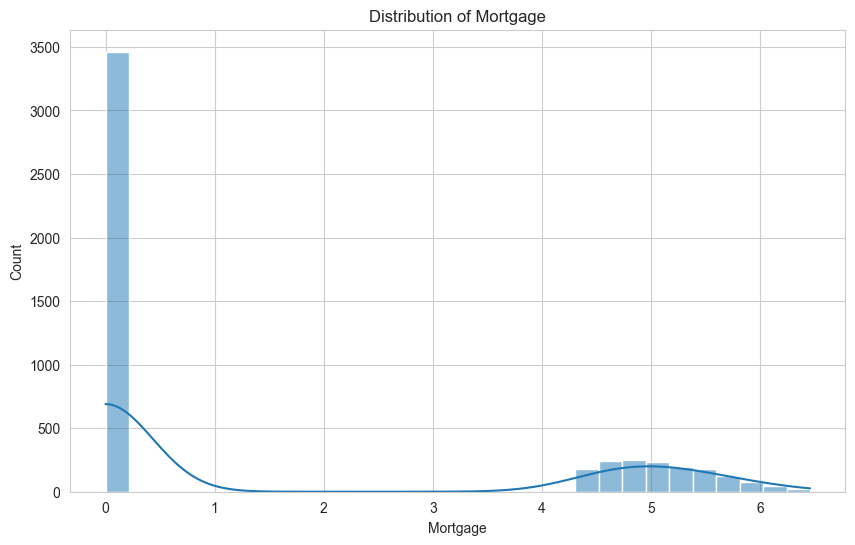

Customers with Credit Cards:
0    3530
1    1470
Name: CreditCard, dtype: int64



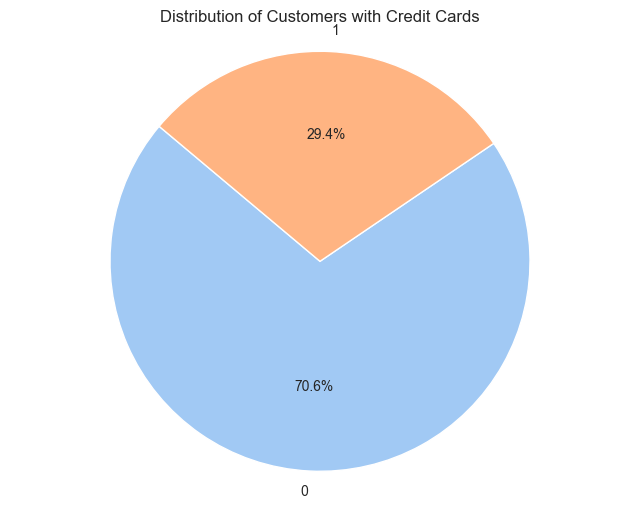

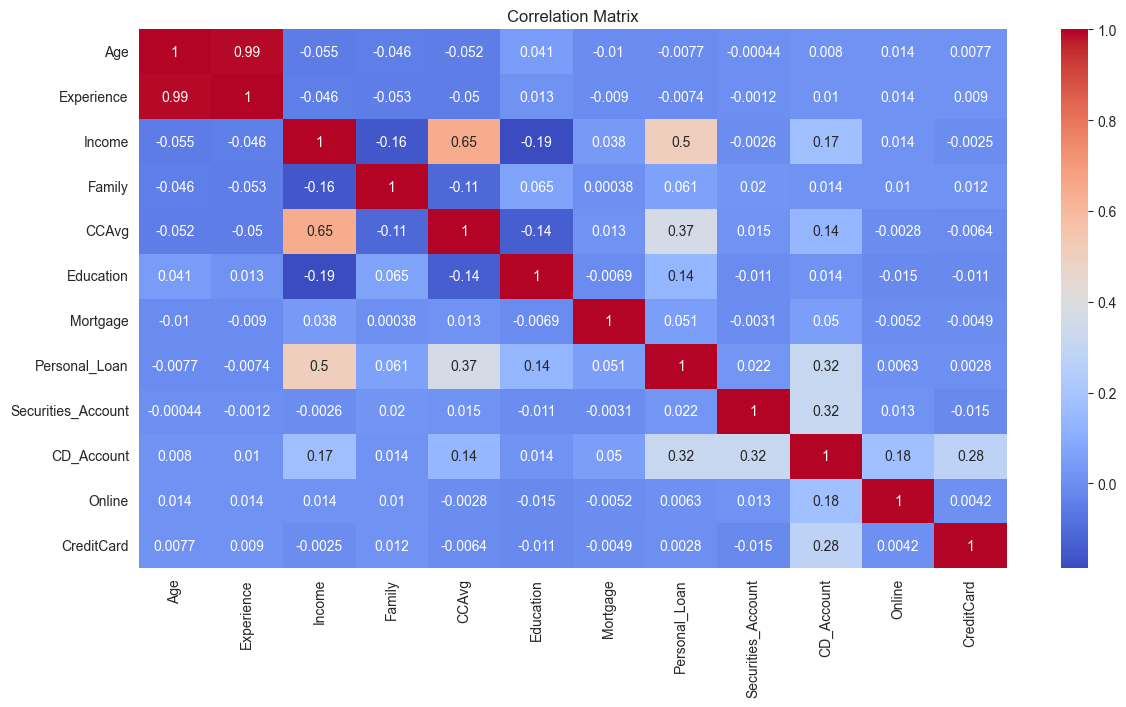

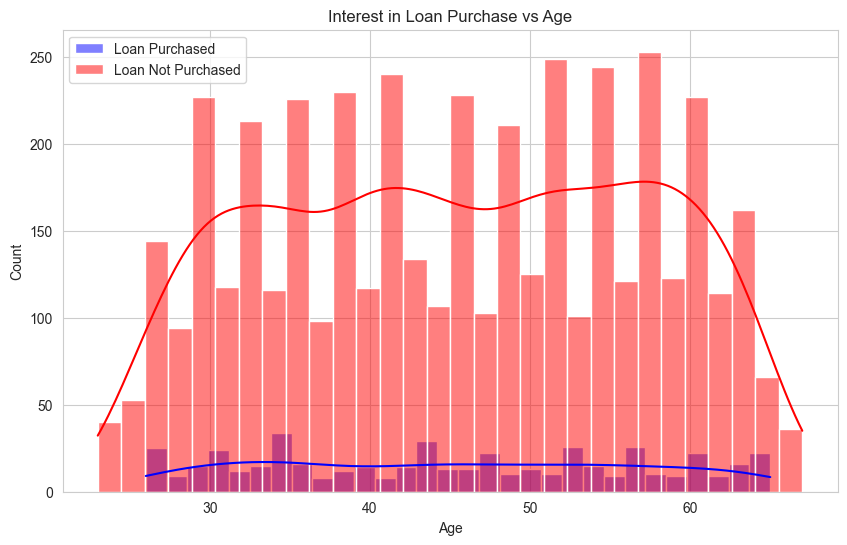

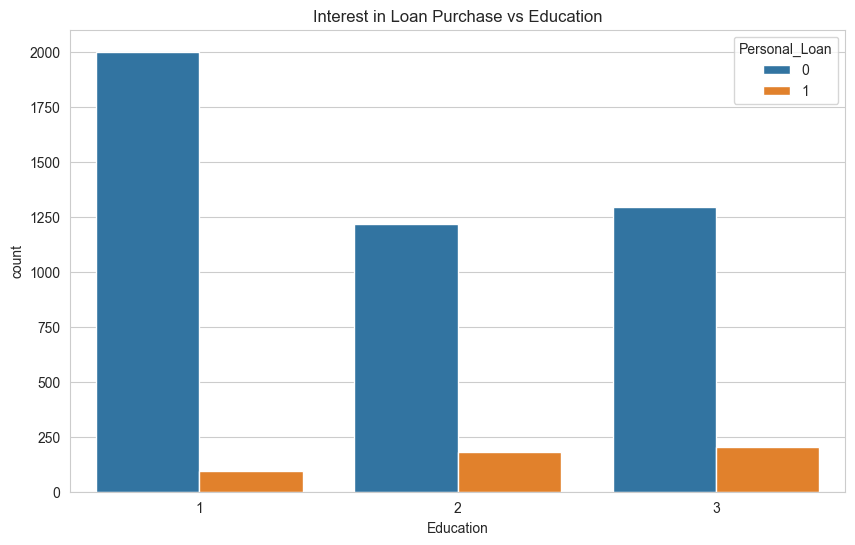

In [78]:
# Distribution of mortgage attribute
plt.figure(figsize=(10,6))
sns.histplot(df_loan['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage')
plt.show()

# Number of customers with credit cards
# Count the number of customers with and without credit cards
credit_card_counts = df_loan['CreditCard'].value_counts()
# Print the counts for reference
print(f"Customers with Credit Cards:\n{credit_card_counts}\n")
# Create a pie chart using seaborn
plt.figure(figsize=(8, 6))
plt.pie(credit_card_counts, labels=credit_card_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Customers with Credit Cards')
plt.axis('equal')
plt.show()

# Correlation matrix
correlation_matrix = df_loan.corr()
plt.figure(figsize=(14,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Loan purchase interest vs. Age
plt.figure(figsize=(10,6))
sns.histplot(df_loan[df_loan['Personal_Loan'] == 1]['Age'], bins=30, color='blue', kde=True, label='Loan Purchased')
sns.histplot(df_loan[df_loan['Personal_Loan'] == 0]['Age'], bins=30, color='red', kde=True, label='Loan Not Purchased')
plt.title('Interest in Loan Purchase vs Age')
plt.legend()
plt.show()

# Loan purchase interest vs. Education
plt.figure(figsize=(10,6))
sns.countplot(x='Education', hue='Personal_Loan', data=df_loan)
plt.title('Interest in Loan Purchase vs Education')
plt.show()

## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [54]:
# Check for missing values
print(df_loan.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [55]:
# Extract state information from ZIP codes using pgeocode
nomi = pgeocode.Nominatim('us')

def get_state(zip_code):
    location = nomi.query_postal_code(zip_code)
    return location.state_name

df_loan['State'] = df_loan['ZIPCode'].apply(lambda x: get_state(str(x).zfill(5)))

# Drop the original ZIP Code column as it is no longer needed
df_loan.drop(columns=['ZIPCode'], inplace=True)

In [56]:
# Drop the ID
df_loan.drop(columns=['ID'], inplace=True)

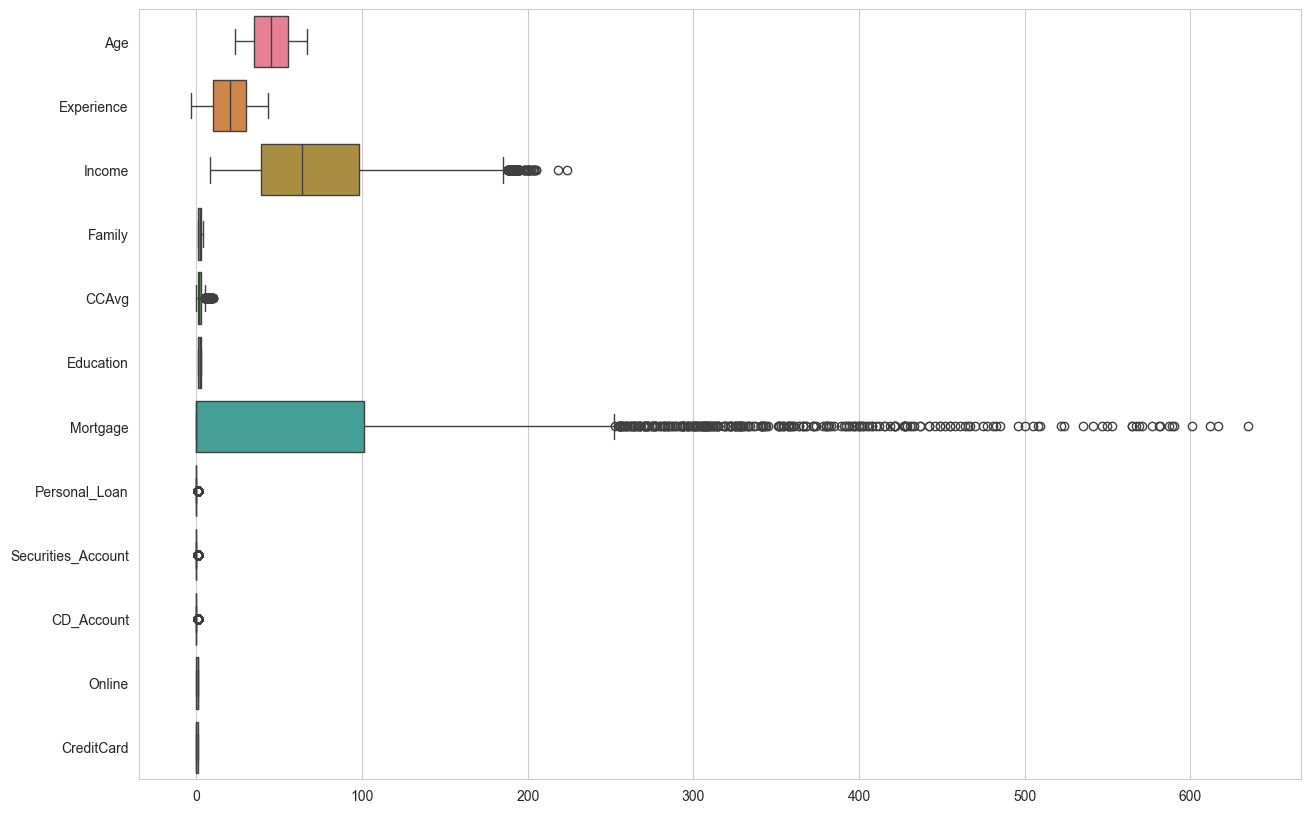

In [57]:
# Identify and handle outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_loan, orient='h')
plt.show()

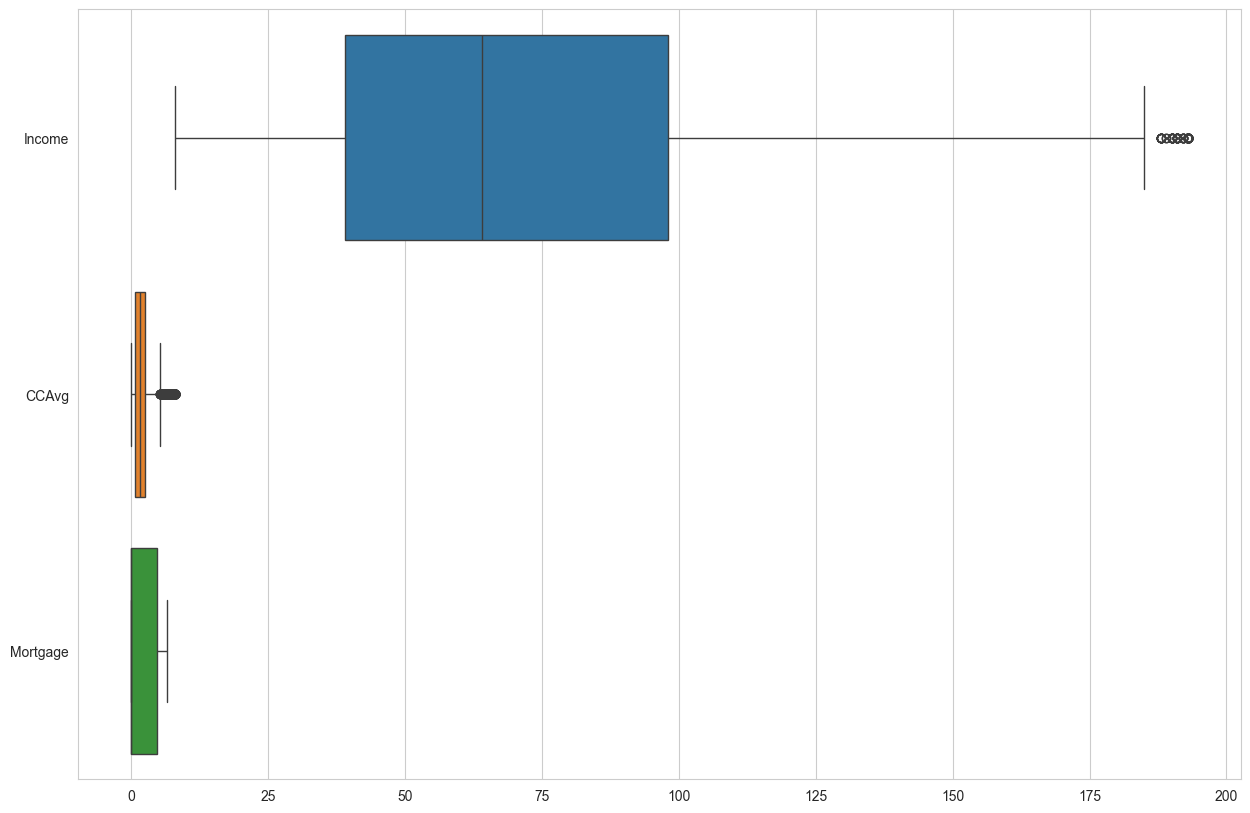

In [58]:
# Function to cap outliers at the 99th percentile
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

# Apply log transformation to the Mortgage feature
df_loan['Mortgage'] = np.log1p(df_loan['Mortgage'])

# Handle outliers for Income, CCAvg, and Mortgage
df_loan = cap_outliers(df_loan, 'Income')
df_loan = cap_outliers(df_loan, 'CCAvg')

# # Drop the original Mortgage column
# df_loan.drop(columns=['Mortgage'], inplace=True)

# Verify the changes with box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_loan[['Income', 'CCAvg', 'Mortgage']], orient='h')
plt.show()


In [59]:
# Convert categorical variables to dummy variables
df_loan = pd.get_dummies(df_loan, drop_first=True)

# Verify the final data preparation
print(df_loan.info())
print(df_loan.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   float64
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 468.9 KB
None
   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1   49.00       4   1.60          1      0.00       

## Model Building

### Model Evaluation Criterion

The evaluation criterion for this model focuses on identifying customers who are likely to accept a personal loan. Given the business context, both precision and recall for the minority class (customers who accept the loan) are crucial. Therefore, the model evaluation will emphasize the following metrics:

1. **Accuracy**: Overall correctness of the model, calculated as the proportion of true results (both true positives and true negatives) among the total number of cases examined. This provides a general sense of how well the model performs across both classes.
2. **Precision (Positive Predictive Value)**: The proportion of positive identifications (customers predicted to accept the loan) that are actually correct. This is crucial to ensure that the marketing efforts are targeted at genuinely interested customers, thus optimizing marketing resources.
3. **Recall (Sensitivity or True Positive Rate)**: The proportion of actual positives (customers who accept the loan) that are correctly identified by the model. High recall ensures that most of the potential customers are captured, maximizing the conversion rate.
4. **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both concerns. It is particularly useful when there is an uneven class distribution, as it combines precision and recall into one measure.
5. **Confusion Matrix**: A detailed breakdown of true positives, true negatives, false positives, and false negatives, which helps in understanding the types of errors the model is making.

The primary goal is to maximize the F1-score for the minority class while maintaining a high overall accuracy, ensuring that the model is both precise and comprehensive in identifying potential loan customers.

In this code:

ZIP code is used to extract state information using pgeocode.
The state information is then converted to dummy variables and included in the feature set for model training.
This ensures that geographical information derived from the ZIP code is utilized in the analysis and model training.

*


### Model Building

In [61]:
# Split data into training and testing sets
X = df_loan.drop(columns=['Personal_Loan'])
y = df_loan['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.98
Confusion Matrix:
[[1331   12]
 [  18  139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



### Model Performance Improvement

In [62]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


# Feature selection
# ---------------------
from sklearn.feature_selection import RFE

# Initialize RFE with the model
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Train and evaluate the model with selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(f"Test set accuracy with selected features: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Addressing Class Imbalance:
# ---------------------
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with balanced data
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)
print(f"Test set accuracy with SMOTE: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation accuracy: 0.9831428571428571
Test set accuracy: 0.98
Confusion Matrix:
[[1330   13]
 [  17  140]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Selected features: Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')
Test set accuracy with selected features: 0.9793333333333333
Confusion Matrix:
[[1330   13]
 [  18  139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1      

## Model Comparison and Final Model Selection

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gb)}")


# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(f"Logistic Regression accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")


Random Forest accuracy: 0.9893333333333333
Confusion Matrix:
[[1342    1]
 [  15  142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.90      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Gradient Boosting accuracy: 0.99
Confusion Matrix:
[[1340    3]
 [  12  145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.98      0.92      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Logistic Regression accuracy: 0.95
Confusion Matrix:
[[1326   17]
 [  58   99]]
Classification Report:
              precision    reca

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean()} ± {scores.std()}")


Cross-validation accuracy: 0.9857142857142858 ± 0.000903507902905227


## Actionable Insights and Business Recommendations


___

### Model Performance Summary:
- **Gradient Boosting:** 
  - Highest overall accuracy at 0.990.
  - Strong precision (0.98) and recall (0.92) for class 1 (loan accepted).
  - F1-score is high at 0.95.
- **Random Forest:** 
  - Slightly lower accuracy (0.989) compared to Gradient Boosting.
  - Higher precision for class 1 (0.99) but slightly lower recall (0.90).
  - F1-score is also 0.95.
- **Decision Tree (Hyperparameter Tuning):** 
  - Accuracy of 0.980.
  - Good precision (0.92) and recall (0.89) for class 1.
  - F1-score of 0.90.
- **Decision Tree (Selected Features):** 
  - Similar performance to the hyperparameter-tuned model.
  - Accuracy of 0.979.
  - Precision of 0.91 and recall of 0.89 for class 1.
  - F1-score of 0.90.
- **Decision Tree (SMOTE):** 
  - Lower accuracy at 0.975.
  - Improved recall (0.92) for class 1 at the expense of precision (0.86).
  - F1-score of 0.89.
- **Logistic Regression:** 
  - Lower performance compared to other models.
  - Accuracy of 0.95.
  - Precision of 0.85 and recall of 0.63 for class 1.
  - F1-score of 0.73.

### Conclusion:
Gradient Boosting has slightly better recall, which means it is slightly better at identifying customers who will accept the loan. Given this and its strong overall performance, Gradient Boosting is the recommended model for predicting loan acceptance. 

Cross-validation accuracy: 0.9857142857142858 ± 0.000903507902905227

In [88]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier

# Build and fit the Gradient Boosting model
final_model = GradientBoostingClassifier(random_state=42)
final_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(final_model, 'final_gradient_boosting_model.pkl')


['final_gradient_boosting_model.pkl']

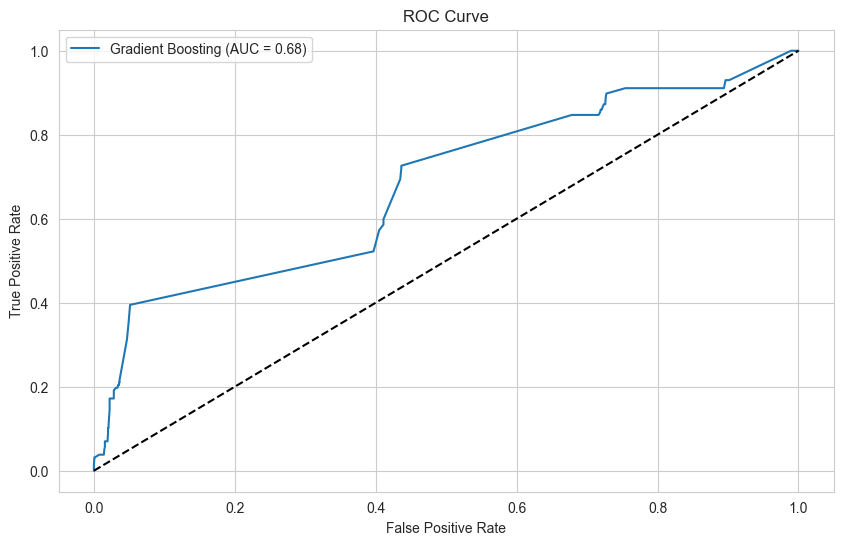

In [83]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


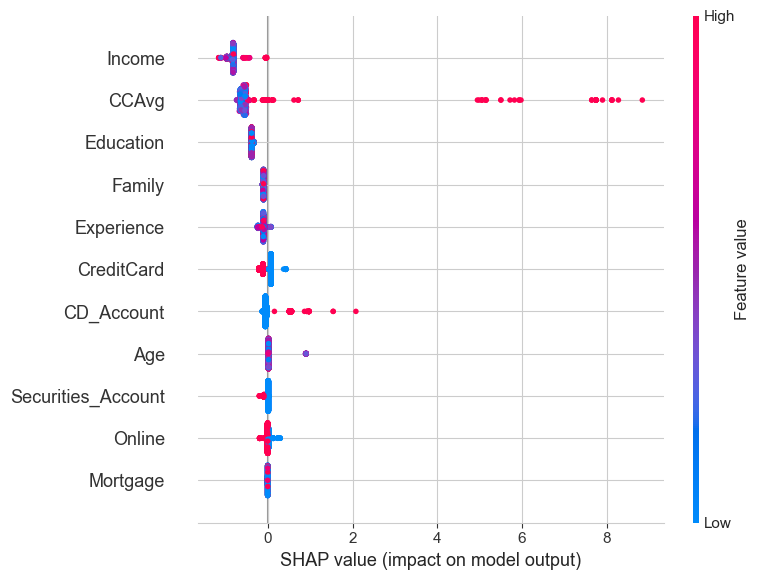

In [84]:
# !pip install shap
import shap

explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


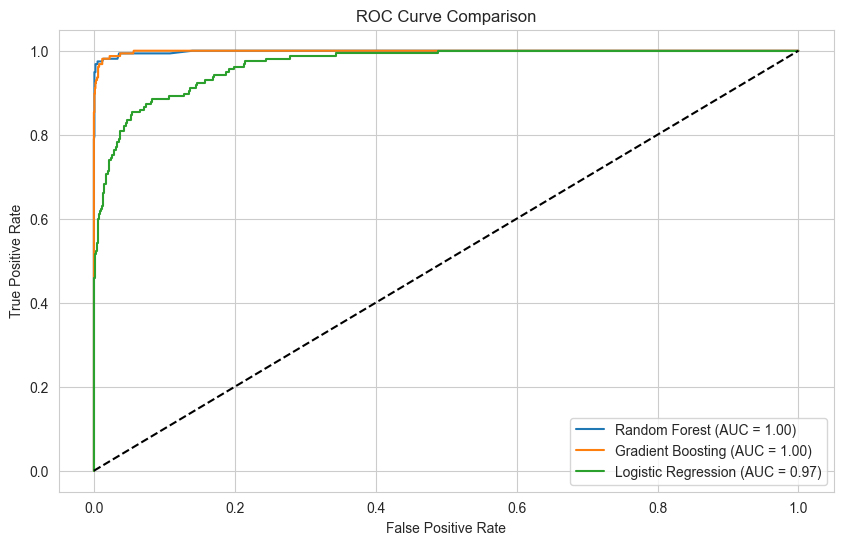

In [85]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Train the models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

# Get prediction probabilities
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()
